# DS-SF-30 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [2]:
df = pd.read_csv(os.path.join('..', '..', 'dataset', 'dataset-ucla-admissions.csv'))

df.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


## Questions

> ### Question 1.  How many observations are in our dataset?

In [5]:
df.shape[0]

400

Answer: 400 rows

> ### Question 2.  Create a summary table.

In [6]:
df.describe()

C:\Users\Tom Goldman\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,NaN,NaN,NaN
50%,0.000000,NaN,NaN,NaN
75%,1.000000,NaN,NaN,NaN
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

The scales of the two are completely different!  GPA is 0.00 to 4.00, GRE is 200 to 800

Variance is 1/n * the sum of (x - mu)**2

For GPA the biggest oulier from the mean of 3.39 is 2.26... which when the difference is taken and squared yields 1.28... contrasted with for GPA the biggest oulier from the mean of 588 is 220... which when the difference is taken and squared yields 135,424!



Answer:

> ### Question 4.  Drop data points with missing data.

In [10]:
df = df.dropna(axis=0)

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

In [18]:
df.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

Answer: None of the columns now have null data

> ### Question 6.  Create boxplots for `gre` and `gpa`.

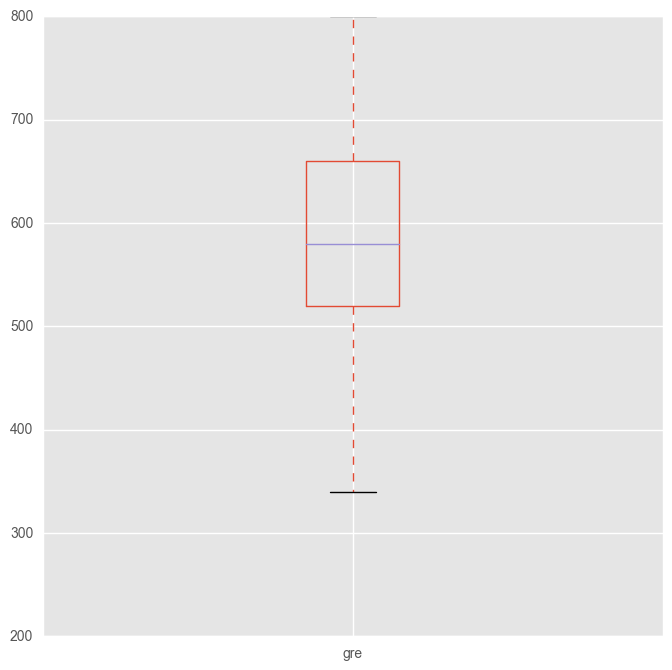

In [20]:
df.gre.plot(kind = 'box', figsize = (8, 8))

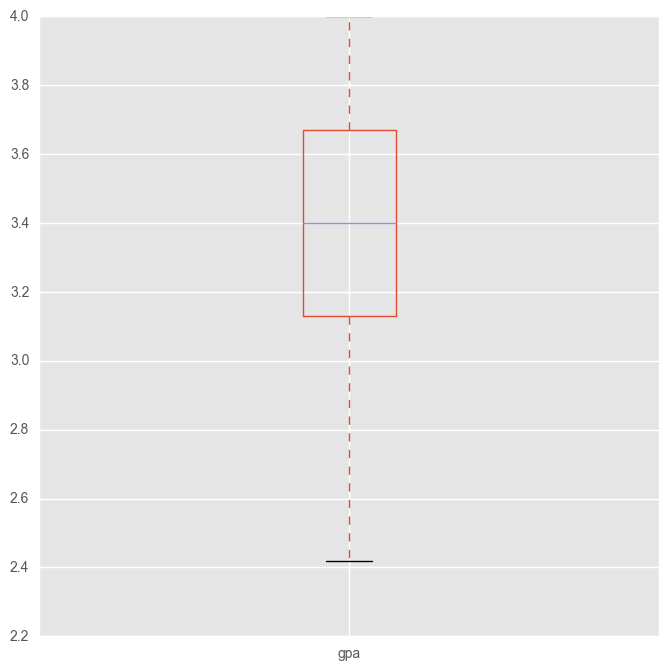

In [21]:
df.gpa.plot(kind = 'box', figsize = (8, 8))

> ### Question 7.  What do boxplots show?

Answer: Boxplots give a quick view into the range of the data (min, max, median, the IQR (Q3-Q1))

> ### Question 8.  Plot the distribution of each variable.

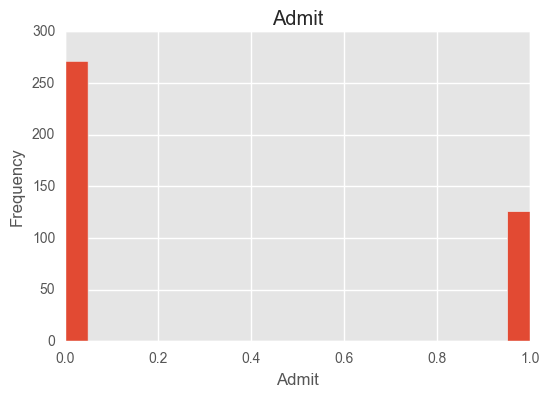

In [29]:
df.admit.plot(kind='hist', bins=20, title='Admit')
plt.xlabel('Admit')
plt.ylabel('Frequency')

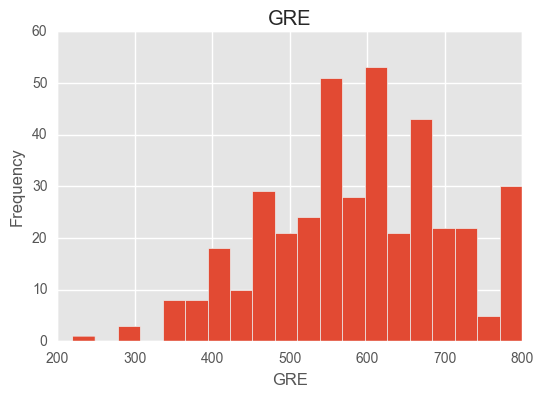

In [24]:
df.gre.plot(kind='hist', bins=20, title='GRE')
plt.xlabel('GRE')
plt.ylabel('Frequency')

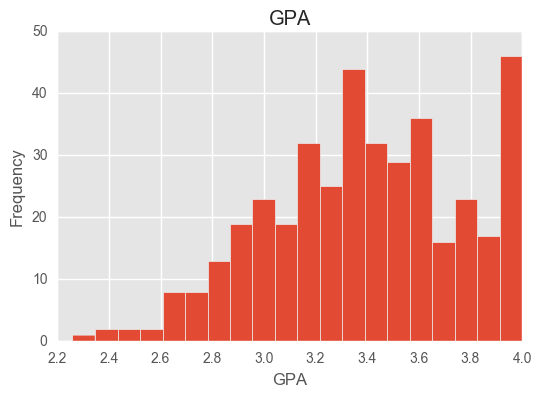

In [25]:
df.gpa.plot(kind='hist', bins=20, title='GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')

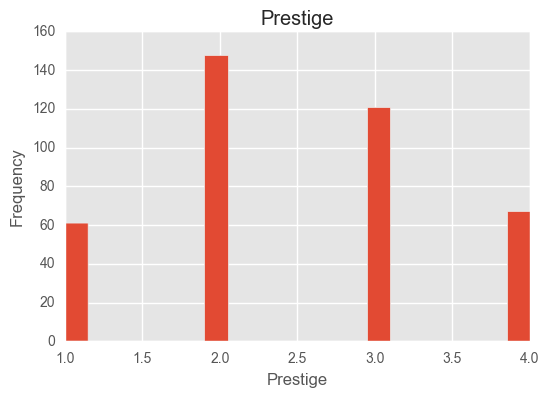

In [30]:
df.prestige.plot(kind='hist', bins=20, title='Prestige')
plt.xlabel('Prestige')
plt.ylabel('Frequency')

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

Since both GPA and GRE have spikes at the highest value (4.00 for GPA and 800 for GRE) they wouldn't meet the requirement of
being normally distrubuted (tails should fade out towards zero)

If it was truly desired to have a normal distribution, you could omit the perfect scores (4.00 for GPA and 800 for GRE)... however this wouldn't not be a desired approach.  A better approach would be to accept that the distribution is bimodel and has skew to the left -- which makes sense given that a top school like UCLA will draw a higher than typical amount of applicants with perfect scores.

> ### Question 10.  Create a correlation matrix for the dataset

In [22]:
df.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

GPA and GRE are moderately positively correlated (a correlation coefficient of 0.38)

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

I would run a linear regression with Admit as the dependent variable and Prestige as the independent variable.  As part of running the regression I would check significance by checking that the p-value is less than 0.05 for the intercept and the coefficient for Prestige.  Lastly, I would check R-squared (zero to one) to get a feel for how much of the variation in Admit can be explained by the linear regression on Prestige.

> ### Question 13.  What is your hypothesis?

Given that the correlation coefficient between admit and prestige is -0.24 (negatively correlated) it would seem to suggest that going to a prestigious school can actually work against you for admission to UCLA.  Hypothesis: "Does the prestige of one's school have an effect on one's admission to UCLA?".